In [1]:
import sys
import os
sys.path.insert(1, os.path.realpath(os.path.pardir))
from scripts.data_analysis_utils import load_data, load_csv, plot_diff, generate_dataframe
import pandas as pd

In [2]:
data_kitti = load_data('./data/kitti_dict_p_v2')
with open('./data/downscale_keepaspect.csv') as data:
    data_yt = load_csv(data)

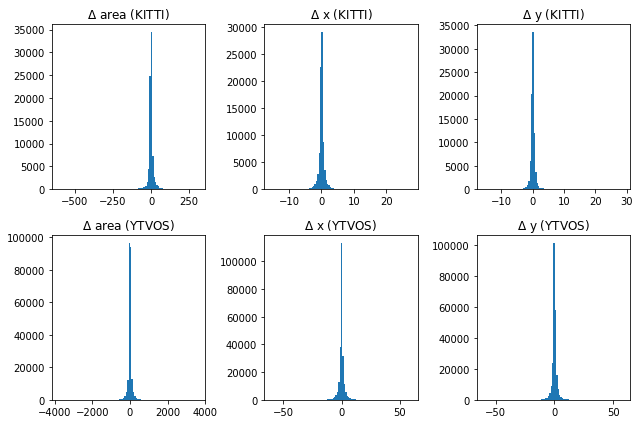

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(3*3,2*3))
metrics = ['area','x','y']
semilog = False
data_dicts = [data_kitti, data_yt]
for i,x in enumerate(data_dicts):
    for j,y in enumerate(metrics):
        plt.subplot(2,3,1+i*len(metrics) + j).set_title(r'$\Delta$ {} ({})'.format(y,'YTVOS' if i==1 else 'KITTI'))
        plot_diff(x, y, semilogy=semilog)
plt.tight_layout()
plt.savefig('{}_plots.pdf'.format('semilog' if semilog else 'linear'))

In [4]:
data_dicts = [data_kitti, data_yt]
dfs = []
for i,x in enumerate(data_dicts):
    dfs.append(generate_dataframe(x))

In [5]:
pd.concat([dfs[i].loc[dfs[i]['category'] == 'all'][['category', 'N', *[col for col in dfs[i].columns if 'kurtosis' in col]]].sort_values('N',ascending=False) for i in range(len(dfs))])

,category,N,kurtosis_area,kurtosis_x,kurtosis_y
0,all,82506,68.92,38.50,65.39
0,all,234652,76.49,39.98,35.59


In [6]:
pd.concat([dfs[i].loc[dfs[i]['category'] == 'all'][['category', 'N', *[col for col in dfs[i].columns if 'll' in col]]].sort_values('N',ascending=False) for i in range(len(dfs))])

,category,N,ll_gennorm_area,ll_norm_area,ll_laplace_area,ll_gennorm_x,ll_norm_x,ll_laplace_x,ll_gennorm_y,ll_norm_y,ll_laplace_y
0,all,82506,-3.21e+05,-3.79e+05,-3.35e+05,-8.72e+04,-1.20e+05,-9.25e+04,-7.59e+04,-1.07e+05,-7.86e+04
0,all,234652,-1.29e+06,-1.45e+06,-1.33e+06,-4.50e+05,-5.64e+05,-4.74e+05,-4.40e+05,-5.45e+05,-4.60e+05


In [7]:
pd.concat([dfs[i].loc[dfs[i]['category'] == 'all'][['category', 'N', *[col for col in dfs[i] if any([col.startswith(x) for x in ['laplace','gennorm','norm']])]]].sort_values('N',ascending=False) for i in range(len(dfs))])

,category,N,gennorm_area,norm_area,laplace_area,gennorm_x,norm_x,laplace_x,gennorm_y,norm_y,laplace_y
0,all,82506,"[4.55e-01, 1.00e+00, 1.01e+00]","[4.53e-01, 2.39e+01]","[1.00e+00, 1.07e+01]","[5.87e-01, 4.76e-02, 1.69e-01]","[5.34e-02, 1.04e+00]","[5.49e-02, 5.64e-01]","[6.94e-01, 1.02e-02, 2.32e-01]","[3.84e-02, 8.86e-01]","[1.71e-02, 4.77e-01]"
0,all,234652,"[4.44e-01, 1.47e-16, 5.04e+00]","[2.25e-01, 1.16e+02]","[7.73e-09, 5.28e+01]","[5.15e-01, 1.15e-14, 2.57e-01]","[2.32e-03, 2.68e+00]","[7.54e-09, 1.38e+00]","[5.48e-01, 2.93e-13, 3.08e-01]","[8.81e-03, 2.47e+00]","[9.15e-04, 1.30e+00]"
